# Leap of Faith in PyTorch [L3] -Autograd and Computational Graphs (Day 3) - Demo

### Step 1: Create Tensors for GDP Data

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define years and GDP growth data (annual %)
years = torch.tensor(np.arange(1990, 2024), dtype=torch.float32).view(-1, 1)
gdp_growth_data = torch.tensor([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
], dtype=torch.float32).t()

# Normalize data
gdp_data_min = gdp_growth_data.min()
gdp_data_max = gdp_growth_data.max()
gdp_growth_normalized = (gdp_growth_data - gdp_data_min) / (gdp_data_max - gdp_data_min)

### Step 2: Define a Simple Linear Model

In [4]:
# Initialize model parameters
num_countries = gdp_growth_data.size(1)
params = torch.nn.Parameter(torch.randn(1, num_countries) * 0.01)  # Adjusted for num_countries
intercepts = torch.nn.Parameter(torch.zeros(1, num_countries))

# Define model and loss
def linear_model(x, params, intercepts):
    return x @ params + intercepts

### Step 3: Define the Loss Function

In [13]:
def mse_loss(pred, target):
    return ((pred - target) ** 2).mean()

### Step 4: Train the Model

In [5]:
# Training parameters
learning_rate = 0.001
epochs = 1000

for epoch in range(epochs):
    # Zero gradients
    params.grad = None
    intercepts.grad = None
    
    # Forward pass
    predicted_gdp = linear_model(years, params, intercepts)
    loss = mse_loss(predicted_gdp, gdp_growth_normalized)
    
    # Backward pass and optimization
    loss.backward()
    with torch.no_grad():
        params.grad.data.clamp_(-1, 1)
        intercepts.grad.data.clamp_(-1, 1)
        params -= learning_rate * params.grad
        intercepts -= learning_rate * intercepts.grad
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Trained Parameters (slope):", params)
print("Trained Intercepts:", intercepts)

Epoch 0, Loss: 58.366111755371094
Epoch 100, Loss: 0.9355851411819458
Epoch 200, Loss: 0.9248090982437134
Epoch 300, Loss: 0.9155427813529968
Epoch 400, Loss: 0.9076433777809143
Epoch 500, Loss: 0.9009800553321838
Epoch 600, Loss: 0.8954331278800964
Epoch 700, Loss: 0.8908932209014893
Epoch 800, Loss: 0.8872597813606262
Epoch 900, Loss: 0.8844417929649353
Trained Parameters (slope): Parameter containing:
tensor([[ 2.4993e-04, -4.0587e-04,  5.3075e-05, -3.6090e-04,  1.6355e-04]],
       requires_grad=True)
Trained Intercepts: Parameter containing:
tensor([[-0.3052,  0.2051, -0.1286,  0.0848, -0.2375]], requires_grad=True)


### Step 5: Predict Future GDP

In [6]:
# Predict future GDP growth
future_years = torch.tensor(np.arange(2024, 2027), dtype=torch.float32).view(-1, 1)
future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
future_gdp_growth_predictions = linear_model(future_years_normalized, params, intercepts)

# Denormalize predictions
future_gdp_growth_predictions_denorm = future_gdp_growth_predictions * (gdp_data_max - gdp_data_min) + gdp_data_min

# Ensure tensor is correctly shaped
future_gdp_growth_predictions_denorm = future_gdp_growth_predictions_denorm.detach().numpy()
print("Future GDP Growth Predictions (Denormalized):\n", future_gdp_growth_predictions_denorm)

Future GDP Growth Predictions (Denormalized):
 [[-23.302423  -8.644022 -18.228128 -12.103941 -21.356464]
 [-23.302204  -8.644377 -18.22808  -12.104256 -21.356321]
 [-23.301987  -8.64473  -18.228035 -12.10457  -21.356178]]


### Step 6: Visualize the Results

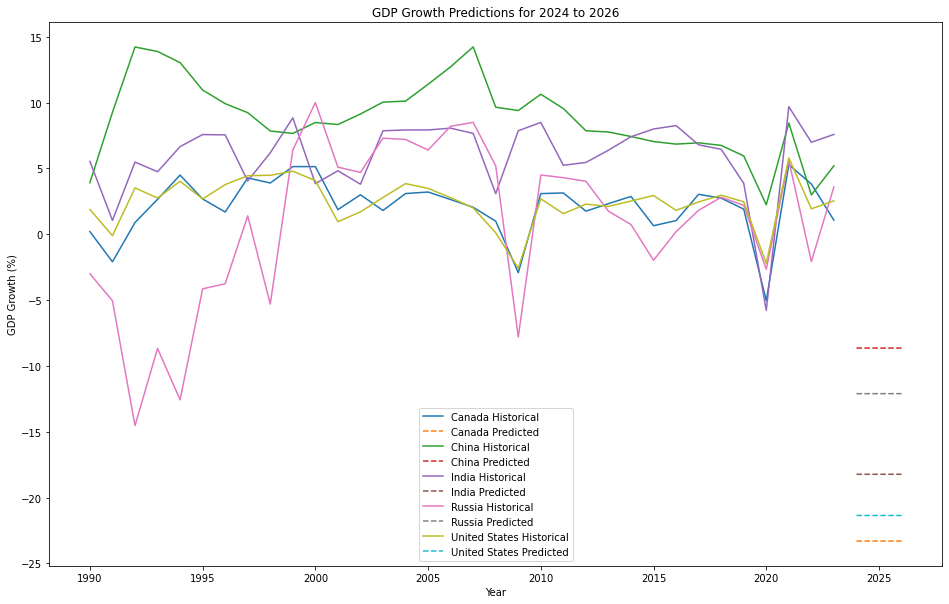

In [16]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(16, 10))  # Adjust size as needed

# Plot results
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.plot(years.numpy(), gdp_growth_data[:, i].detach().numpy(), label=f'{country} Historical')
    plt.plot(future_years.numpy(), future_gdp_growth_predictions_denorm[:, i], linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth Predictions for 2024 to 2026')
plt.legend()
plt.show()

## Steps 1 - 6: All In One

Epoch 0, Loss: 309.0866394042969
Epoch 100, Loss: 2.9542224407196045
Epoch 200, Loss: 2.858262538909912
Epoch 300, Loss: 2.7676162719726562
Epoch 400, Loss: 2.6819562911987305
Epoch 500, Loss: 2.6009771823883057
Epoch 600, Loss: 2.524392604827881
Epoch 700, Loss: 2.4519381523132324
Epoch 800, Loss: 2.3833634853363037
Epoch 900, Loss: 2.3184380531311035
Trained Parameters (slope): Parameter containing:
tensor([[-0.0006, -0.0002,  0.0013, -0.0006,  0.0012]], requires_grad=True)
Trained Intercepts: Parameter containing:
tensor([[ 0.2651,  0.0824, -0.3182,  0.2775, -0.2506]], requires_grad=True)
Future GDP Growth Predictions (Denormalized):
 [[ -6.924396  -12.166499  -23.643396   -6.5689807 -21.703575 ]
 [ -6.924923  -12.1667    -23.642227   -6.569541  -21.702549 ]
 [ -6.9254503 -12.166903  -23.64106    -6.5701027 -21.701523 ]]


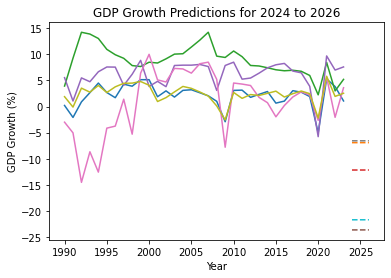

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define years and GDP growth data (annual %)
years = torch.tensor(np.arange(1990, 2024), dtype=torch.float32).view(-1, 1)
gdp_growth_data = torch.tensor([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
], dtype=torch.float32).t()

# Normalize data
gdp_data_min = gdp_growth_data.min()
gdp_data_max = gdp_growth_data.max()
gdp_growth_normalized = (gdp_growth_data - gdp_data_min) / (gdp_data_max - gdp_data_min)

# Initialize model parameters
num_countries = gdp_growth_data.size(1)
params = torch.nn.Parameter(torch.randn(1, num_countries) * 0.01)  # Adjusted for num_countries
intercepts = torch.nn.Parameter(torch.zeros(1, num_countries))

# Define model and loss
def linear_model(x, params, intercepts):
    return x @ params + intercepts

def mse_loss(pred, target):
    return ((pred - target) ** 2).mean()

# Training parameters
learning_rate = 0.001
epochs = 1000

for epoch in range(epochs):
    # Zero gradients
    params.grad = None
    intercepts.grad = None
    
    # Forward pass
    predicted_gdp = linear_model(years, params, intercepts)
    loss = mse_loss(predicted_gdp, gdp_growth_normalized)
    
    # Backward pass and optimization
    loss.backward()
    with torch.no_grad():
        params.grad.data.clamp_(-1, 1)
        intercepts.grad.data.clamp_(-1, 1)
        params -= learning_rate * params.grad
        intercepts -= learning_rate * intercepts.grad
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Trained Parameters (slope):", params)
print("Trained Intercepts:", intercepts)

# Predict future GDP growth
future_years = torch.tensor(np.arange(2024, 2027), dtype=torch.float32).view(-1, 1)
future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
future_gdp_growth_predictions = linear_model(future_years_normalized, params, intercepts)

# Denormalize predictions
future_gdp_growth_predictions_denorm = future_gdp_growth_predictions * (gdp_data_max - gdp_data_min) + gdp_data_min

# Ensure tensor is correctly shaped
future_gdp_growth_predictions_denorm = future_gdp_growth_predictions_denorm.detach().numpy()
print("Future GDP Growth Predictions (Denormalized):\n", future_gdp_growth_predictions_denorm)

# Plot results
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.plot(years.numpy(), gdp_growth_data[:, i].detach().numpy(), label=f'{country} Historical')
    plt.plot(future_years.numpy(), future_gdp_growth_predictions_denorm[:, i], linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth Predictions for 2024 to 2026')
# plt.legend()
plt.show()
